In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# gerais

import pandas as pd
from tqdm import tqdm


# Gensim
from nltk import tokenize
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#plot
import matplotlib.pyplot as plt
import pyLDAvis
#import pyLDAvis.gensim_models



import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from unidecode import unidecode


from string import punctuation

from gensim.models import LdaMulticore, CoherenceModel


In [ ]:
df = pd.read_csv('../datasets/fakeTelegram.BR_2022.csv', delimiter=',', index_col=0)

In [4]:
len(df)

557586

In [5]:
df.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
date_message,,,,,,,,,,,,,,,,,,,
2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...
2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...
2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...
2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica
2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,NaN


In [6]:
df.columns

Index(['id_member_anonymous', 'id_group_anonymous', 'media', 'media_type',
       'media_url', 'has_media', 'has_media_url', 'trava_zap',
       'dataset_info_id', 'date_system', 'score_sentiment',
       'score_misinformation', 'id_message', 'id_persona', 'message_type',
       'messenger', 'media_name', 'media_md5', 'pre_processed_text'],
      dtype='object')

In [4]:
ids_para_remover = ['b73c0b674b28d87375d78dcae2f1a21f','62b3aa83e4df122e48cb1f97583e403f',
                    '893874da7344daaa00b8b5b3dc295b59','38737f3c7a07586c4efbfa39aa345705',
                    'da4cbbc1b7b1192ad83bcdae613ac2c3', 'bf66a467459264e0d33e4c8518a82827',
                    '46e009035e6150d656d0c194db88fb07','811541f6ce49347d1798e8dd2d3cbf83',
                    '1d2a0a63333d12ad188e9e6f7f2e0419','7c379613d4da713fe959d8c7ddc11ce2',
                    'debe17fd10d504076d2df8682f63bfc6','e9713ae04a02a810d6f33dd956f42794',
                    'd6c77928db26721ce46aca2d549780f0','8e53464d3b01eea3e39d07e51ecbb1b4',
                    'bacd40da04dd7d13f646993bdcf8e79d','2273d1167a6212812d95dc8fadbae78e',
                    'cd3bb1bdf75be7595e6373171a5c2225','add8c1ba533c5e5450d92c061a5ee7bf',
                    'e198f90df1995528531dd43db0c935ea', '06dc9ac55ed64caab2bd97e9ab717302',
                    'c0110feb539d212836605b66192722dd','f71912700ac5331415408ce229681359',
                    '2ee692357a9c948351c43a9540e859ae', '25b66278176dabe814dfc25a405a2470',
                    '08b21cb1e7de74ef5fe1085230075523']

In [5]:
# Filtrar o DataFrame para remover as linhas com esses IDs
df_filtrado = df[~df['id_member_anonymous'].isin(ids_para_remover)]
df_filtrado

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
date_message,,,,,,,,,,,,,,,,,,,
2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...
2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...
2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...
2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica
2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-...,True,True,False,5,2022-11-16 14:49:39.146502,0.1027,NaN,575796,Wanda Silva,Url,telegram,NaN,25e43b6a58b848c43ad5b5f9e979822a,bndes tem lucro de r 9 6 bilhões no terceiro t...
2022-11-11 12:09:08,NaN,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,5,2022-11-16 14:49:39.847434,0.0000,NaN,1286443,Wanda Silva,Url,telegram,NaN,657949d03e4088f6b332e2686ccd3221,youtu be
2022-11-11 12:09:47,NaN,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,5,2022-11-16 14:49:39.922279,0.0000,NaN,13294,Wanda Silva,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e,empresários demitam os petistas primeiro t me


In [6]:
# Removendo linhas com valores NaN na coluna 'pre_processed_text'
df_filtrado = df_filtrado.dropna(subset=['pre_processed_text'])

# Removendo trava_zap
df_filtrado = df_filtrado[df_filtrado['trava_zap'] == False]



#df_filtrado = df_filtrado[0:100]
len(df_filtrado)

443759

In [7]:
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

In [8]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):

    # Função para extrair e substituir o domínio da URL
    def substituir_dominios(texto):
        # Função para extrair e substituir o domínio da URL
        def extrair_dominio(url):
            # Remove o protocolo (http://, https://, etc.) e o "www." se presente
            dominio = re.sub(r'^https?://(?:www\.)?|www\.', '', url)
            # Remove o caminho e parâmetros da URL
            dominio = re.split(r'[/?#]', dominio)[0]
            # Retorna a parte principal do domínio (antes do primeiro ponto)
            return dominio.split('.')[0]

        # Substitui URLs por seus domínios principais
        return re.sub(r'https?://(?:www\.)?\S+|www\.\S+', lambda match: extrair_dominio(match.group(0)), texto)

    # Substituir domínios
    text = substituir_dominios(text)

    # Converte para minúsculas
    text = text.lower()

    # Remove acentos
    text = unidecode(text)

    #Remover Pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove URLs e menções
    #text = re.sub(r'http\S+|www\S+|https\S+|@\w+', '', text)

    # Substitui emojis repetidos por apenas um
    text = re.sub(r'([\U00010000-\U0010FFFF])\1+', r'\1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF])\1+', r'\1', text)


    # Remove espaços em branco extras (início ou final) e múltiplos espaços no meio do texto
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove pontuações e caracteres especiais
    #text = re.sub(r'[^\w\s]', '', text)

    # Ajusta risadas "kkk" ou mais para "kk"
    text = re.sub(r'k{2,}|K{2,}', 'kk', text)

    # Ajusta risadas "haha" ou mais para "haha"
    text = re.sub(r'(ha){2,}', 'haha', text, flags=re.IGNORECASE)

    # Ajusta risadas "kaka" ou mais para "kaka"
    text = re.sub(r'(ka){2,}', 'kaka', text, flags=re.IGNORECASE)

    # Remove as stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text


[nltk_data] Downloading package punkt to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:

df_geral = df_filtrado.copy()

# Aplicar o pré-processamento à coluna de texto
df_geral['text_processed'] = df_geral['pre_processed_text'].apply(preprocess_text)

In [13]:
df_geral.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text,text_processed
date_message,,,,,,,,,,,,,,,,,,,,
2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...,entao fato renato audio ouvi whatsapp ocorreu ...
2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...,saiu youtube presidente 8 horas atras infelizm...
2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...,parte ja quase toda feita segundo turno comple...
2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica,gente achei seita maconarica
2022-10-05 06:28:30,NaN,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:29:29.046694,0.7003,0.197813,2735,Wanda Silva,Texto,telegram,NaN,NaN,kķkkk to rindo até agora quem disse q ia fazer...,kk to rindo ate agora disse q ia fazer acordo ...


### Calculando a diversidade dos tópicos
A diversidade de tópicos mede quantas palavras únicas existem entre os top-N termos de todos os tópicos. 

In [49]:

def topic_diversity(model, top_n=10):
    topic_words = []
    for k in range(model.num_topics):
        words = [word for word, _ in model.show_topic(k, topn=top_n)]
        topic_words.extend(words)
    unique_words = set(topic_words)
    return len(unique_words) / (top_n * model.num_topics)


### IRBO 

IRBO avalia quanto os tópicos são distintos entre si, usando o Rank-Biased Overlap (RBO) invertido. Quanto maior o IRBO, mais diferentes são os tópicos

In [50]:
import rbo

def compute_irbo(model, top_n=10):
    topics = []
    for k in range(model.num_topics):
        topic_terms = [word for word, _ in model.show_topic(k, topn=top_n)]
        topics.append(topic_terms)

    # Calcular média dos RBOs invertidos entre todos os pares
    n = len(topics)
    total_irbo = 0
    count = 0

    for i in range(n):
        for j in range(i + 1, n):
            rbo_score = rbo.RankingSimilarity(topics[i], topics[j]).rbo()
            total_irbo += (1 - rbo_score)
            count += 1

    return total_irbo / count if count > 0 else 0


## Modelando os Tópicos sem filtro

In [52]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto]

texto_processado = df_geral['text_processed'].apply(processar_texto)

In [53]:
# Criar dicionário
id2word = corpora.Dictionary(texto_processado)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus = [id2word.doc2bow(text) for text in texto_processado]

Calculando coerência (c_npmi): 100%|██████████| 14/14 [44:49<00:00, 192.09s/it]


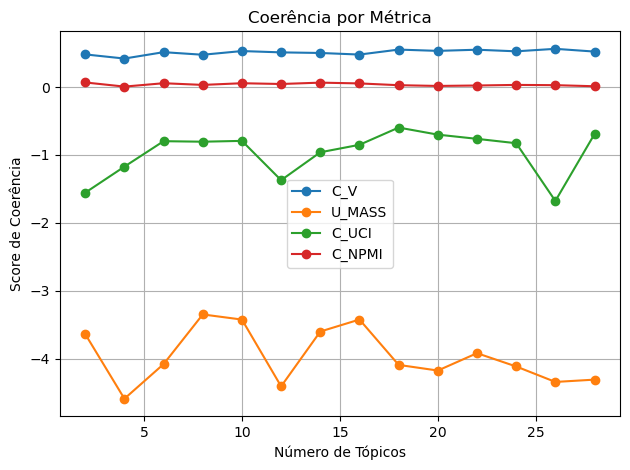


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.4828
Qtd. tópicos = 4 -> Coerência = 0.4218
Qtd. tópicos = 6 -> Coerência = 0.5158
Qtd. tópicos = 8 -> Coerência = 0.4778
Qtd. tópicos = 10 -> Coerência = 0.5323
Qtd. tópicos = 12 -> Coerência = 0.5128
Qtd. tópicos = 14 -> Coerência = 0.504
Qtd. tópicos = 16 -> Coerência = 0.4806
Qtd. tópicos = 18 -> Coerência = 0.5539
Qtd. tópicos = 20 -> Coerência = 0.5349
Qtd. tópicos = 22 -> Coerência = 0.552
Qtd. tópicos = 24 -> Coerência = 0.5283
Qtd. tópicos = 26 -> Coerência = 0.5651
Qtd. tópicos = 28 -> Coerência = 0.5245
Melhor número de tópicos segundo C_V: 26

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -3.6399
Qtd. tópicos = 4 -> Coerência = -4.5928
Qtd. tópicos = 6 -> Coerência = -4.0824
Qtd. tópicos = 8 -> Coerência = -3.3502
Qtd. tópicos = 10 -> Coerência = -3.4261
Qtd. tópicos = 12 -> Coerência = -4.4105
Qtd. tópicos = 14 -> Coerência = -3.6023
Qtd. tópicos = 16 -> Coerência = -3.4255
Qtd. tóp

In [54]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus=corpus,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word,
    corpus=corpus,
    texts=texto_processado,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [55]:
# tamanho do corpus
len(corpus)


443759

In [56]:

pyLDAvis.enable_notebook()  # Se estiver no Jupyter
# ou use: pyLDAvis.enable_notebook(force=True)

# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  # No Jupyter: isso exibe o gráfico interativo


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.238691  0.091412       1        1  25.361728
4      0.138712  0.030942       2        1  19.473831
5      0.206696  0.038363       3        1  15.929757
7     -0.358877  0.322169       4        1   9.000342
3      0.079497  0.043085       5        1   8.478297
6     -0.168968 -0.190862       6        1   8.081452
2      0.053547 -0.072194       7        1   7.785638
1     -0.189299 -0.262915       8        1   5.888955, topic_info=         Term          Freq         Total Category  logprob  loglift
1364    youtu  75504.000000  75504.000000  Default  30.0000  30.0000
1174       be  77297.000000  77297.000000  Default  29.0000  29.0000
85         13  71383.000000  71383.000000  Default  28.0000  28.0000
647      user  78195.000000  78195.000000  Default  27.0000  27.0000
1078      the  45875.000000  45875.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1024    deste   2598.055378   4337.160694   Topic8  -5.3893   2.3196
462    amigos   2756.096296   7016.706980   Topic8  -5.3303   1.8976
612   direita   2758.723721   7299.818029   Topic8  -5.3293   1.8590
316    patria   2687.570696   6827.969471   Topic8  -5.3555   1.8997
236   familia   2710.834035   8366.257748   Topic8  -5.3469   1.7051

[561 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
923       6  0.999769        0
77        2  0.083939       00
77        3  0.002159       00
77        6  0.913678       00
78        2  0.077059      000
...     ...       ...      ...
1364      5  0.999986    youtu
23        2  0.426300  youtube
23        5  0.094851  youtube
23        6  0.013670  youtube
23        7  0.465154  youtube

[1190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 8, 4, 7, 3, 2])

In [57]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.8625
IRBO médio: 0.968

Perplexidade:  -8.310447950177666


In [58]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'u_mass', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
24    -0.266747 -0.035203       1        1  12.082333
21    -0.214266 -0.027546       2        1   7.844546
22    -0.081238  0.130957       3        1   6.916888
17    -0.250546 -0.000487       4        1   6.497394
2      0.191659  0.071646       5        1   6.120781
15    -0.163749  0.127670       6        1   4.700862
1     -0.091030  0.157556       7        1   4.379076
10    -0.151893 -0.153297       8        1   4.283068
8      0.144385  0.136420       9        1   4.057004
25    -0.165538  0.053416      10        1   3.658756
0     -0.118514 -0.030310      11        1   3.625752
4      0.110070  0.192252      12        1   3.266665
23     0.068764  0.179989      13        1   3.052312
14    -0.004897 -0.167062      14        1   2.883743
16     0.119911 -0.147709      15        1   2.842261
19     0.042688  0.186106      16        1   2.832001
5     -0.003063 -0.129923      17        1   2.591926
11    -0.088391 -0.014425      18        1   2.447485
3     -0.094863 -0.080249      19        1   2.360019
7      0.187282 -0.008677      20        1   2.304288
18     0.202106  0.004189      21        1   2.298631
20    -0.022110 -0.171428      22        1   1.992094
6      0.191387 -0.113830      23        1   1.977943
13     0.116384 -0.014325      24        1   1.754137
12     0.126997  0.034704      25        1   1.657137
9      0.215211 -0.180435      26        1   1.572897, topic_info=          Term          Freq         Total Category  logprob  loglift
1174        be  55962.000000  55962.000000  Default  30.0000  30.0000
1364     youtu  54276.000000  54276.000000  Default  29.0000  29.0000
85          13  64019.000000  64019.000000  Default  28.0000  28.0000
647       user  89757.000000  89757.000000  Default  27.0000  27.0000
772       lula  56341.000000  56341.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
28         bem   3616.487243  18444.757296  Topic26  -3.7384   2.5230
4251      siga   1394.497110   3307.108031  Topic26  -4.6914   3.2887
3672  noticias   1747.632788   5948.083404  Topic26  -4.4657   2.9274
378    verdade   2121.014784  17124.103814  Topic26  -4.2721   2.0637
541          t   1616.576340  41999.691454  Topic26  -4.5436   0.8949

[1745 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
923       9  0.999836     0
77        6  0.014535    00
77        9  0.985298    00
78        3  0.001339   000
78        5  0.004016   000
...     ...       ...   ...
4020     10  0.005376  zona
4020     11  0.588448  zona
4020     12  0.243693  zona
4020     13  0.056981  zona
4020     21  0.001433  zona

[5054 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[25, 22, 23, 18, 3, 16, 2, 11, 9, 26, 1, 5, 24, 15, 17, 20, 6, 12, 4, 8, 19, 21, 7, 14, 13, 10])

In [59]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.7731
IRBO médio: 0.9706

Perplexidade:  -10.282262544847281


In [60]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.264458 -0.011664       1        1  14.491342
14    -0.256476 -0.055075       2        1  11.375580
5     -0.102353  0.000275       3        1   9.218491
16    -0.228395  0.077001       4        1   8.649200
6      0.199830  0.085675       5        1   6.642462
15    -0.183951 -0.070684       6        1   6.362393
7     -0.184761  0.055486       7        1   6.222424
4     -0.048608  0.200349       8        1   5.284273
11    -0.126682 -0.227202       9        1   5.281227
12     0.103274 -0.007705      10        1   4.702355
9      0.089326 -0.235026      11        1   3.353886
2      0.144190  0.135497      12        1   3.165781
17     0.179423 -0.132243      13        1   2.976572
3      0.019060  0.197669      14        1   2.966740
1      0.085196  0.011071      15        1   2.708855
0      0.154323  0.042334      16        1   2.339094
8      0.247111 -0.168616      17        1   2.186529
10     0.173949  0.102861      18        1   2.072796, topic_info=            Term          Freq         Total Category  logprob  loglift
85            13  81694.000000  81694.000000  Default  30.0000  30.0000
1174          be  62000.000000  62000.000000  Default  29.0000  29.0000
1364       youtu  60355.000000  60355.000000  Default  28.0000  28.0000
647         user  76076.000000  76076.000000  Default  27.0000  27.0000
28363  community  43245.000000  43245.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
2998      seguir   1007.704953   2322.724521  Topic18  -5.2923   3.0412
3940           h    729.052602   1086.002759  Topic18  -5.6159   3.4778
3314     ultimos    746.899021   1855.875794  Topic18  -5.5918   2.9661
978            p    799.384606   3812.400571  Topic18  -5.5238   2.3141
737         vale    736.017954   2421.750811  Topic18  -5.6064   2.6853

[1184 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
923      10  0.999832         0
77        3  0.364725        00
77        7  0.000239        00
77        8  0.009337        00
77       10  0.625550        00
...     ...       ...       ...
7666      1  0.060078  zambelli
7666      4  0.002794  zambelli
7666      8  0.936795  zambelli
4858      8  0.003448      zema
4858     14  0.995313      zema

[3105 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 15, 6, 17, 7, 16, 8, 5, 12, 13, 10, 3, 18, 4, 2, 1, 9, 11])

In [61]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.8
IRBO médio: 0.9678

Perplexidade:  -9.498204890771344


In [62]:

pyLDAvis.enable_notebook() 

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'u_mass'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  

PreparedData(topic_coordinates=              x    y  topics  cluster      Freq
topic                                          
0      0.274512  0.0       1        1  79.74723
1     -0.274512  0.0       2        1  20.25277, topic_info=          Term          Freq         Total Category  logprob  loglift
1174        be  77312.000000  77312.000000  Default  30.0000  30.0000
1364     youtu  75463.000000  75463.000000  Default  29.0000  29.0000
647       user  68451.000000  68451.000000  Default  28.0000  28.0000
1078       the  47514.000000  47514.000000  Default  27.0000  27.0000
2042      this  41128.000000  41128.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1534  telegram  14861.246279  18094.516359   Topic2  -4.8806   1.4000
457        www  25090.628811  36557.212483   Topic2  -4.3568   1.2205
23     youtube  18781.420170  26160.521155   Topic2  -4.6465   1.2655
922      video  12653.538673  21070.931917   Topic2  -5.0414   1.0869
541          t  15463.109556  39297.704573   Topic2  -4.8409   0.6642

[118 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
923       1  0.008399        0
923       2  0.991619        0
85        1  0.997183       13
85        2  0.002818       13
134       1  0.021080       55
...     ...       ...      ...
1083      2  0.999884      you
1364      1  0.000013    youtu
1364      2  0.999989    youtu
23        1  0.282066  youtube
23        2  0.717914  youtube

[172 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [63]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 1.0
IRBO médio: 1.0

Perplexidade:  -8.412375750024756


## Modelando os Tópicos com filtro religioso

In [64]:
palavras_religiosas = [
    "deus", "jesus", "misericordia", "davi",
    "salomao", "reino", "templo", "conservador",
    "pentecostal", "rcc", "renovacao", "carismatic",
    "paulo ricardo", "bernardo kuster", "herege", "ateu",
    "jerico", "heresia"
]


In [65]:
# Função para verificar se uma palavra está relacionada à religião
def relacionada_religiao(word):
    word_lower = word.lower()
    palavras_religiosas_lower = [palavra.lower() for palavra in palavras_religiosas]

    # Verificando se alguma palavra da lista de palavras religiosas está presente
    return any(palavra in word_lower for palavra in palavras_religiosas_lower)


df_religiao = df_geral[df_geral['text_processed'].apply(lambda x: relacionada_religiao(x))]



In [66]:
len(df_religiao)

25713

In [67]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto]

texto_processado_religiao = df_religiao['text_processed'].apply(processar_texto)

In [68]:
# Criar dicionário
id2word_religiao = corpora.Dictionary(texto_processado_religiao)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus_religiao = [id2word_religiao.doc2bow(text) for text in texto_processado_religiao]

Calculando coerência (c_npmi): 100%|██████████| 14/14 [08:51<00:00, 37.95s/it]


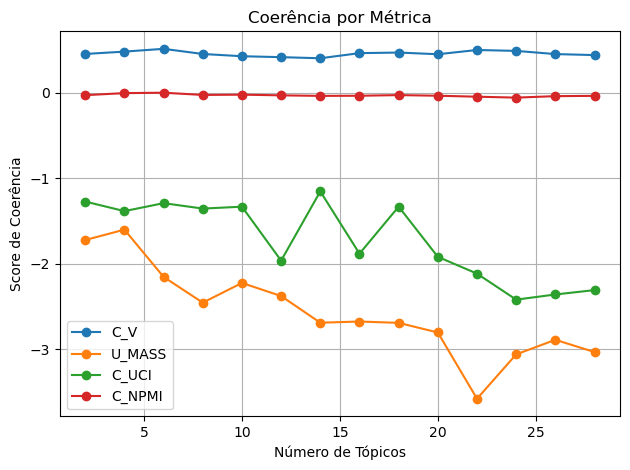


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.4527
Qtd. tópicos = 4 -> Coerência = 0.4802
Qtd. tópicos = 6 -> Coerência = 0.5127
Qtd. tópicos = 8 -> Coerência = 0.4524
Qtd. tópicos = 10 -> Coerência = 0.4262
Qtd. tópicos = 12 -> Coerência = 0.4152
Qtd. tópicos = 14 -> Coerência = 0.4024
Qtd. tópicos = 16 -> Coerência = 0.4623
Qtd. tópicos = 18 -> Coerência = 0.4692
Qtd. tópicos = 20 -> Coerência = 0.4495
Qtd. tópicos = 22 -> Coerência = 0.4991
Qtd. tópicos = 24 -> Coerência = 0.4886
Qtd. tópicos = 26 -> Coerência = 0.4513
Qtd. tópicos = 28 -> Coerência = 0.4396
Melhor número de tópicos segundo C_V: 6

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -1.7239
Qtd. tópicos = 4 -> Coerência = -1.6026
Qtd. tópicos = 6 -> Coerência = -2.1552
Qtd. tópicos = 8 -> Coerência = -2.4568
Qtd. tópicos = 10 -> Coerência = -2.226
Qtd. tópicos = 12 -> Coerência = -2.3792
Qtd. tópicos = 14 -> Coerência = -2.6914
Qtd. tópicos = 16 -> Coerência = -2.6772
Qtd. tóp

In [69]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus_religiao, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus_religiao, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus_religiao, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus_religiao=corpus_religiao,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word_religiao,
    corpus_religiao=corpus_religiao,
    texts=texto_processado_religiao,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [77]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.079743 -0.051575       1        1  53.715670
3     -0.071031 -0.140810       2        1  20.683197
2     -0.131741  0.165275       3        1  14.099720
1      0.282516  0.027110       4        1  11.501413, topic_info=            Term          Freq         Total Category  logprob  loglift
91            55  11022.000000  11022.000000  Default  30.0000  30.0000
20232      phone   8041.000000   8041.000000  Default  29.0000  29.0000
389        grupo  10837.000000  10837.000000  Default  28.0000  28.0000
241    liberdade   8260.000000   8260.000000  Default  27.0000  27.0000
490         user   6396.000000   6396.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
3395       paulo   1631.181054   2172.413151   Topic4  -4.7772   1.8762
196      familia   3419.494823   5887.561853   Topic4  -4.0371   1.6194
4            bem   3129.066371   5880.533645   Topic4  -4.1258   1.5318
12          deus   4153.666671  26597.729474   Topic4  -3.8426   0.3059
309          sao   1755.206093   6322.102920   Topic4  -4.7040   0.8812

[357 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
19534      1  0.987964    0xx47
19534      2  0.002906    0xx47
19534      3  0.005812    0xx47
19534      4  0.002906    0xx47
37         1  0.403619        1
...      ...       ...      ...
2578       4  0.002428    youtu
3243       1  0.059596  youtube
3243       2  0.145679  youtube
3243       3  0.674315  youtube
3243       4  0.120295  youtube

[959 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [78]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.8
IRBO médio: 0.8418

Perplexidade:  -7.987441642242672


In [71]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'u_mass', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.101696  0.056591       1        1  27.196401
5     -0.093579  0.029377       2        1  23.096196
2     -0.061351  0.037441       3        1  15.743185
4     -0.042637  0.115923       4        1  14.185644
3     -0.080146 -0.231852       5        1  12.267715
1      0.379409 -0.007480       6        1   7.510860, topic_info=            Term          Freq         Total Category  logprob  loglift
91            55  12570.000000  12570.000000  Default  30.0000  30.0000
389        grupo  10639.000000  10639.000000  Default  29.0000  29.0000
241    liberdade   7996.000000   7996.000000  Default  28.0000  28.0000
20232      phone   9200.000000   9200.000000  Default  27.0000  27.0000
490         user   6305.000000   6305.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
196      familia   3240.809991   5670.942001   Topic6  -3.6646   2.0293
4            bem   2847.135127   5803.079399   Topic6  -3.7941   1.8767
3395       paulo   1364.851055   2190.461448   Topic6  -4.5294   2.1158
12          deus   3314.369092  26667.337055   Topic6  -3.6422   0.5036
309          sao   1482.488397   6290.277699   Topic6  -4.4467   1.1435

[535 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
34        1  0.041087     00
34        2  0.081301     00
34        3  0.119765     00
34        4  0.218550     00
34        5  0.532387     00
...     ...       ...    ...
2578      2  0.003550  youtu
2578      3  0.001308  youtu
2578      4  0.009904  youtu
2578      5  0.978813  youtu
2578      6  0.001121  youtu

[1912 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 3, 5, 4, 2])

In [72]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.7
IRBO médio: 0.8219

Perplexidade:  -7.882933729088238


In [73]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.124619 -0.084002       1        1  14.832707
8     -0.115467 -0.039650       2        1  13.400494
11    -0.105530 -0.013763       3        1  11.269048
5     -0.115530 -0.038984       4        1  10.100322
2     -0.034701 -0.039903       5        1   7.412430
9      0.379474 -0.172975       6        1   7.064977
0     -0.094963  0.005705       7        1   6.926357
7     -0.000674 -0.013637       8        1   6.547646
3     -0.053752 -0.032457       9        1   4.401941
10    -0.064740  0.057402      10        1   4.251821
1      0.083351  0.228471      11        1   4.109950
13    -0.025187  0.028116      12        1   4.018864
4      0.176624  0.202066      13        1   3.705038
6      0.095714 -0.086389      14        1   1.958404, topic_info=         Term          Freq         Total Category  logprob  loglift
91         55  11993.000000  11993.000000  Default  30.0000  30.0000
20232   phone   8775.000000   8775.000000  Default  29.0000  29.0000
389     grupo  11032.000000  11032.000000  Default  28.0000  28.0000
2577       be   4647.000000   4647.000000  Default  27.0000  27.0000
2578    youtu   4604.000000   4604.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
137    brasil    186.392361  11531.759680  Topic14  -5.1761  -0.1920
261       nao    185.296998  38093.610756  Topic14  -5.1820  -1.3928
962     vamos    141.877641   5497.767279  Topic14  -5.4490   0.2759
567     deste    133.481988   3684.135162  Topic14  -5.5100   0.6152
4         bem    133.730996   6090.488561  Topic14  -5.5081   0.1144

[1157 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1807      1  0.007036        0
1807      2  0.009381        0
1807      3  0.082084        0
1807      4  0.028143        0
1807      5  0.004691        0
...     ...       ...      ...
3243     13  0.158069  youtube
3243     14  0.023339  youtube
6133      5  0.959578   zerado
348       8  0.965734    zerou
349       8  0.963021     zica

[5999 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 9, 12, 6, 3, 10, 1, 8, 4, 11, 2, 14, 5, 7])

In [74]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.5571
IRBO médio: 0.7951

Perplexidade:  -7.92954651909292


In [75]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.054303  0.095851       1        1  35.630989
5      0.052504  0.076973       2        1  16.472703
4      0.068928  0.079873       3        1  14.876103
3      0.054509 -0.244918       4        1  12.310024
2      0.086874 -0.009575       5        1  11.293748
0     -0.317118  0.001797       6        1   9.416434, topic_info=            Term          Freq         Total Category  logprob  loglift
91            55  13129.000000  13129.000000  Default  30.0000  30.0000
20232      phone   9632.000000   9632.000000  Default  29.0000  29.0000
241    liberdade   8004.000000   8004.000000  Default  28.0000  28.0000
389        grupo  10258.000000  10258.000000  Default  27.0000  27.0000
2344        lula   6812.000000   6812.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
389        grupo   5770.536076  10258.129939   Topic6  -3.3138   1.7874
4            bem   2957.869951   5743.902332   Topic6  -3.9821   1.6990
3395       paulo   1347.078167   2126.583852   Topic6  -4.7686   1.9061
12          deus   4043.129147  26915.378807   Topic6  -3.6695   0.4670
309          sao   1919.339719   6280.484732   Topic6  -4.4146   1.1772

[540 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
37639      1  0.002855      001
37639      2  0.014274      001
37639      3  0.973503      001
37639      4  0.002855      001
37639      5  0.005710      001
...      ...       ...      ...
3243       2  0.244749  youtube
3243       3  0.091162  youtube
3243       4  0.016845  youtube
3243       5  0.463736  youtube
3243       6  0.153588  youtube

[1896 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 4, 3, 1])

In [76]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.7167
IRBO médio: 0.8

Perplexidade:  -7.898930425088044


## Modelando os tópicos com filtro de inclusão religioso e exclusão de termas políticos

In [24]:
palavras_politicas = [ "lula", "bolsonaro", "pt", "pl", "stf", "patria", "55", "22", "13", "senadores", "lulaladrao",
                       "urnas", "alexandre", "moraes", "comunismo", "eleicao", "eleicoes", "esquerda", "direita",
                         "presidente", "tse", "fraude", "voto", "turno", "ministro"]

In [25]:
def retirar_mensagens_com_palavras_politicas(word):
    word_lower = word.lower()
    palavras_politica_lower = [palavra.lower() for palavra in palavras_politicas]

    return any(palavra in word_lower for palavra in palavras_politica_lower)


df_politico = df_religiao[~df_religiao['text_processed'].apply(lambda x: retirar_mensagens_com_palavras_politicas(x))]



In [26]:
df_politico.shape

(8566, 20)

In [27]:
df_politico.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text,text_processed
date_message,,,,,,,,,,,,,,,,,,,,
2022-10-05 06:43:51,NaN,99561fb8c30a84c837927176b102d5d5,b9cf0b8950c9c0cf18c62f1904472cc1.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:43:54.882245,0.7096,0.090596,3632,Wanda Silva,Imagem,telegram,NaN,6a72ad1e5a9c7d7caf41ccaeddc35e52,feedback de mateus alves 29 anos brasil parana...,feedback mateus alves 29 anos brasil parana vo...
2022-10-05 08:56:25,d87aad01c33013334c184d741b3986ad,b11f2df64ac19aad47a50accf32052d6,NaN,NaN,NaN,False,False,False,5,2022-10-05 08:56:38.378482,0.9656,0.045114,157109,Wanda Silva,Texto,telegram,NaN,NaN,o senhor quando lembrou a jacó que o nome de j...,senhor lembrou jaco nome jaco ja nao jaco sim ...
2022-10-05 08:56:24,d87aad01c33013334c184d741b3986ad,b11f2df64ac19aad47a50accf32052d6,4ac8be9d59dea0e35ff866eb4d752db1.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 08:56:38.468746,0.6588,NaN,157101,Wanda Silva,Imagem,telegram,NaN,4ac8be9d59dea0e35ff866eb4d752db1,jacó lutou com deus e venceu - as duas casas d...,jaco lutou deus venceu duas casas israel prome...
2022-10-05 09:00:36,83f03c843a33c1933b0caf9252d97527,e3988dfe85b2ba2fa0499a428dd8a20a,NaN,NaN,NaN,False,False,False,5,2022-10-05 09:00:37.924377,0.9940,0.011129,451739,Wanda Silva,Texto,telegram,NaN,NaN,bom dia manter a esperança só quem mantém a ca...,bom dia manter esperanca so mantem caridade ma...
2022-10-05 09:07:29,NaN,43da8c10b93fb7c9078577a567f68ebc,bf38cc385ba2ab65d4facb176ef50c0b.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 09:07:32.204094,0.9712,0.053206,899,Wanda Silva,Imagem,telegram,NaN,bf38cc385ba2ab65d4facb176ef50c0b,muito obrigado pelo seu feedback parabéns cont...,obrigado feedback parabens continue fazendo ne...


In [29]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto ]

texto_processado_politico = df_politico['text_processed'].apply(processar_texto)

In [30]:
# Criar dicionário
id2word_politico = corpora.Dictionary(texto_processado_politico)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus_politico = [id2word_politico.doc2bow(text) for text in texto_processado_politico]

Calculando coerência (c_npmi): 100%|██████████| 14/14 [04:55<00:00, 21.11s/it]


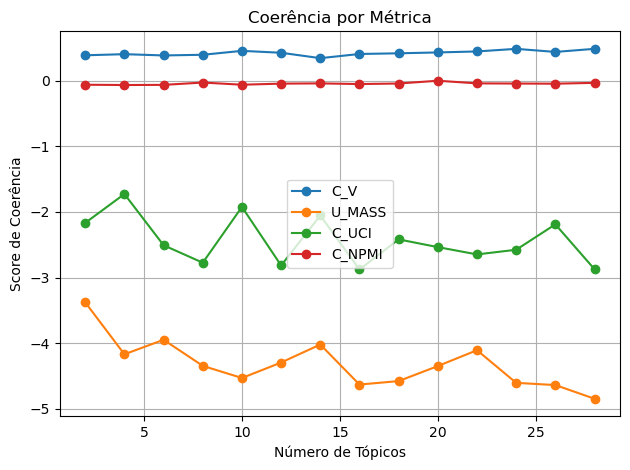


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.3886
Qtd. tópicos = 4 -> Coerência = 0.4057
Qtd. tópicos = 6 -> Coerência = 0.3863
Qtd. tópicos = 8 -> Coerência = 0.3965
Qtd. tópicos = 10 -> Coerência = 0.4562
Qtd. tópicos = 12 -> Coerência = 0.4271
Qtd. tópicos = 14 -> Coerência = 0.3449
Qtd. tópicos = 16 -> Coerência = 0.4086
Qtd. tópicos = 18 -> Coerência = 0.4188
Qtd. tópicos = 20 -> Coerência = 0.4322
Qtd. tópicos = 22 -> Coerência = 0.4471
Qtd. tópicos = 24 -> Coerência = 0.4868
Qtd. tópicos = 26 -> Coerência = 0.4398
Qtd. tópicos = 28 -> Coerência = 0.4871
Melhor número de tópicos segundo C_V: 28

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -3.3776
Qtd. tópicos = 4 -> Coerência = -4.1688
Qtd. tópicos = 6 -> Coerência = -3.948
Qtd. tópicos = 8 -> Coerência = -4.3452
Qtd. tópicos = 10 -> Coerência = -4.5304
Qtd. tópicos = 12 -> Coerência = -4.2945
Qtd. tópicos = 14 -> Coerência = -4.0203
Qtd. tópicos = 16 -> Coerência = -4.6305
Qtd. tó

In [31]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus_politico, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus_politico, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus_politico, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus_politico=corpus_politico,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word_politico,
    corpus_politico=corpus_politico,
    texts=texto_processado_politico,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [39]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.102036  0.0       1        1  68.141189
1     -0.102036  0.0       2        1  31.858811, topic_info=          Term         Freq        Total Category  logprob  loglift
982     existe  1245.000000  1245.000000  Default  30.0000  30.0000
18668  repitam  1157.000000  1157.000000  Default  29.0000  29.0000
390       hoje   591.000000   591.000000  Default  28.0000  28.0000
6       brasil  1036.000000  1036.000000  Default  27.0000  27.0000
549      nunca   546.000000   546.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
353        vai   302.021609   865.677977   Topic2  -5.4518   0.0908
16        user   378.932644  1829.594515   Topic2  -5.2249  -0.4306
314        bem   245.813602   500.632040   Topic2  -5.6577   0.4326
254         so   269.253718   787.534972   Topic2  -5.5666   0.0706
45         bom   251.441201   818.781977   Topic2  -5.6351  -0.0368

[186 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
16421      1  0.031451      2cr
16421      2  0.974972      2cr
259        1  0.924915  abencoe
259        2  0.075068  abencoe
1707       1  0.976077   acabei
...      ...       ...      ...
1175       2  0.137660      www
435        1  0.533727    youtu
435        2  0.466451    youtu
1132       1  0.348142  youtube
1132       2  0.651755  youtube

[278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [41]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.8
IRBO médio: 0.371

Perplexidade:  -8.131373452212387


In [42]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
23     0.052189  0.058110       1        1  25.887894
27     0.077780 -0.006221       2        1   6.473133
15     0.098146  0.052169       3        1   5.678125
6      0.248216  0.060182       4        1   5.490121
18     0.000889  0.021373       5        1   3.430574
14     0.226482 -0.085419       6        1   3.380417
10     0.021720  0.025449       7        1   3.221029
1      0.057456  0.012188       8        1   2.956237
8     -0.003272  0.080343       9        1   2.902794
4     -0.026764  0.058588      10        1   2.796513
21     0.149156  0.009821      11        1   2.741063
20    -0.030467 -0.031370      12        1   2.717974
3     -0.082530 -0.079618      13        1   2.701163
22    -0.076934  0.216222      14        1   2.495137
12    -0.037057  0.044914      15        1   2.483252
0     -0.070181 -0.088966      16        1   2.406316
9      0.072520 -0.161130      17        1   2.297892
17    -0.030046  0.240708      18        1   2.276033
2     -0.040354 -0.136559      19        1   2.248686
19     0.011120 -0.117493      20        1   2.215225
5     -0.079809 -0.075966      21        1   2.125021
13    -0.019487  0.005170      22        1   2.061792
24    -0.096028 -0.079307      23        1   1.967529
16    -0.081174 -0.018802      24        1   1.772842
25    -0.007146 -0.048373      25        1   1.740502
7     -0.105259  0.012369      26        1   1.500304
11    -0.056669  0.055095      27        1   1.265118
26    -0.172497 -0.023475      28        1   0.767312, topic_info=           Term         Freq        Total Category  logprob  loglift
982      existe  1156.000000  1156.000000  Default  30.0000  30.0000
18668   repitam  1079.000000  1079.000000  Default  29.0000  29.0000
8        comigo  1273.000000  1273.000000  Default  28.0000  28.0000
62         deus  8409.000000  8409.000000  Default  27.0000  27.0000
542       jesus  1558.000000  1558.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
6        brasil     4.286812  1255.977609  Topic28  -5.9806  -0.8101
1411         en     3.485302    72.699231  Topic28  -6.1875   1.8323
16         user     3.835858  1368.287050  Topic28  -6.0917  -1.0069
2466   criancas     3.336214    89.739263  Topic28  -6.2313   1.5780
62         deus     3.802559  8409.794608  Topic28  -6.1004  -2.8314

[1785 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
9317       1  0.331008       00
9317       2  0.099302       00
9317      10  0.121370       00
9317      13  0.397209       00
9317      22  0.033101       00
...      ...       ...      ...
1132      26  0.001966  youtube
20830      5  0.912372    yuval
13763      2  0.951792      zap
15402     25  0.927691   zapzap
20932     13  0.966119       zp

[6975 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[24, 28, 16, 7, 19, 15, 11, 2, 9, 5, 22, 21, 4, 23, 13, 1, 10, 18, 3, 20, 6, 14, 25, 17, 26, 8, 12, 27])

In [43]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.5857
IRBO médio: 0.8306

Perplexidade:  -8.139083819507311


In [44]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.026938 -0.075663       1        1  53.944295
0     -0.112478 -0.140128       2        1  20.987342
2     -0.123756  0.176811       3        1  12.966569
3      0.209295  0.038980       4        1  12.101794, topic_info=              Term         Freq        Total Category  logprob  loglift
17            voce  1674.000000  1674.000000  Default  30.0000  30.0000
145            nao  5861.000000  5861.000000  Default  29.0000  29.0000
266       obrigado   933.000000   933.000000  Default  28.0000  28.0000
1132       youtube   439.000000   439.000000  Default  27.0000  27.0000
982         existe  1377.000000  1377.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
548   misericordia   123.122229   279.880664   Topic4  -5.3811   1.2906
342          todos   178.339747  1962.147265   Topic4  -5.0106  -0.2863
145            nao   188.597564  5861.435232   Topic4  -4.9547  -1.3247
200         senhor   135.171126   853.133148   Topic4  -5.2878   0.2694
649           tudo   137.729779  1112.357722   Topic4  -5.2690   0.0229

[333 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
16458      1  0.028876          85
16458      3  0.981777          85
28         1  0.020859  abencoando
28         2  0.966451  abencoando
28         3  0.006953  abencoando
...      ...       ...         ...
435        4  0.386462       youtu
1132       1  0.006824     youtube
1132       2  0.104636     youtube
1132       3  0.002275     youtube
1132       4  0.887130     youtube

[736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [45]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.725
IRBO médio: 0.6252

Perplexidade:  -8.18667891874356


In [46]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.049458  0.030473       1        1  17.182051
18    -0.103563  0.091547       2        1  14.887674
19    -0.028634  0.051882       3        1   5.675135
14     0.026403  0.038405       4        1   5.673167
3      0.082211  0.245532       5        1   5.374538
9     -0.146335  0.004400       6        1   4.951187
7     -0.004147  0.085909       7        1   4.847761
17    -0.040938 -0.067804       8        1   4.578286
15     0.049767  0.108628       9        1   4.153602
6     -0.065762 -0.013316      10        1   3.969227
10    -0.197650 -0.050034      11        1   3.872014
0      0.153816 -0.079382      12        1   3.827444
16    -0.144094 -0.053688      13        1   3.348181
2      0.067722 -0.056970      14        1   2.953264
4      0.090785  0.038288      15        1   2.899378
11     0.029434 -0.094501      16        1   2.718083
8      0.094460 -0.075929      17        1   2.589682
1      0.068275 -0.019437      18        1   2.460113
12     0.141167 -0.090218      19        1   2.053955
5     -0.023459 -0.093786      20        1   1.985257, topic_info=            Term         Freq        Total Category  logprob  loglift
982       existe  1905.000000  1905.000000  Default  30.0000  30.0000
18668    repitam  1783.000000  1783.000000  Default  29.0000  29.0000
8         comigo  2024.000000  2024.000000  Default  28.0000  28.0000
413            t  1119.000000  1119.000000  Default  27.0000  27.0000
266     obrigado  1294.000000  1294.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
414        unido    40.262016   224.617241  Topic20  -4.6913   2.2004
16          user    43.879934  1877.703341  Topic20  -4.6053   0.1631
145          nao    44.979043  6725.193842  Topic20  -4.5805  -1.0880
2778    salvador    35.755566    83.266986  Topic20  -4.8100   3.0741
3728   republica    35.341764    56.628866  Topic20  -4.8216   3.4480

[1310 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
17488     13  0.874877          116
17489     13  0.907968  11983308937
2385       2  0.069216           15
2385       4  0.069216           15
2385       5  0.017304           15
...      ...       ...          ...
1132      19  0.020127      youtube
20830      1  0.041851        yuval
20830     14  0.920729        yuval
15402     11  0.952904       zapzap
20932      7  0.958920           zp

[5065 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 19, 20, 15, 4, 10, 8, 18, 16, 7, 11, 1, 17, 3, 5, 12, 9, 2, 13, 6])

In [47]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.57
IRBO médio: 0.7579

Perplexidade:  -8.249715887752926
